<a href="https://colab.research.google.com/github/Ivndjss/AWPS-Command-Launch-Module/blob/main/%5BDevFest_Zamboanga%5D_Document_Processing_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Document Processing Using Gemini API

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai


from IPython.display import display
from IPython.display import Markdown


from google.colab import drive
drive.mount('/content/drive')

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Mounted at /content/drive


In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> method:

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")
to_markdown(response.text)

CPU times: user 120 ms, sys: 12.3 ms, total: 132 ms
Wall time: 7.74 s


> The meaning of life is a complex and multifaceted question that has been pondered by philosophers, theologians, and scientists for centuries. There is no single definitive answer that is universally accepted, as the meaning of life can vary depending on one's individual beliefs, values, and experiences. However, some common themes that emerge when considering the meaning of life include:
> 
> * **Purpose:** Many people believe that life has a purpose or goal, whether it is to fulfill a divine plan, achieve personal fulfillment, or contribute to the well-being of others.
> * **Happiness:** For some, the meaning of life lies in the pursuit of happiness and the avoidance of suffering. This can include finding joy in relationships, experiences, and accomplishments.
> * **Meaningful work:** Work can be a significant source of meaning for many people, as it can provide a sense of purpose, accomplishment, and social connection.
> * **Love and relationships:** Relationships with loved ones can provide a deep sense of meaning and fulfillment.
> * **Service to others:** Helping others and making a positive impact on the world can be a powerful source of meaning for many people.
> * **Self-discovery and growth:** The journey of self-discovery and personal growth can be a significant source of meaning, as it allows us to better understand and appreciate ourselves and our place in the world.
> 
> Ultimately, the meaning of life is a personal and subjective concept that is shaped by our individual experiences and beliefs. It is a journey of discovery that can evolve and change over time.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [ ]:
response.candidates[0].safety_ratings
#response.prompt_feedback

[category: HARM_CATEGORY_SEXUALLY_EXPLICIT
probability: NEGLIGIBLE
, category: HARM_CATEGORY_HATE_SPEECH
probability: NEGLIGIBLE
, category: HARM_CATEGORY_HARASSMENT
probability: NEGLIGIBLE
, category: HARM_CATEGORY_DANGEROUS_CONTENT
probability: NEGLIGIBLE
]

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 117 ms, sys: 9.26 ms, total: 126 ms
Wall time: 7.06 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)
  to_markdown(chunk.text)

The meaning of life is a deeply personal and philosophical question that has been pondered by
________________________________________________________________________________
 people for centuries. There is no one definitive answer, as the meaning of life can vary for each individual. However, some common themes that have emerged over time
________________________________________________________________________________
 include:

* **Purpose:** Many people believe that life has a purpose, whether it is to serve others, create something meaningful, or simply to experience all that life has to offer. Finding your purpose can provide you with a sense of direction and motivation.
* **Relationships:** Relationships with others are essential for most
________________________________________________________________________________
 people's happiness and well-being. Strong social connections can provide you with love, support, and a sense of belonging.
* **Growth and learning:** Life is a jou

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

But attributes like <code>text</code> do not:

In [ ]:
try:
  response.resolve()
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

## Upload a document and generate content

You can use the File API to upload a document of any size. Always use the File API when the total request size (including the files, text prompt, system instructions, etc.) is larger than 20 MB.

Call `media.upload` to upload a file using the File API. The following code uploads a document file and then uses the file in a call to models.`generateContent`.

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
sample_pdf = genai.upload_file("/content/drive/MyDrive/NIPS-2017-attention-is-all-you-need-Paper.pdf")
response = model.generate_content(["Give me a summary of this pdf file.", sample_pdf])
to_markdown(response.text)

> The paper "Attention is All You Need" introduces the Transformer, a novel neural network architecture for sequence transduction tasks, such as machine translation.  Unlike previous dominant models that relied on recurrent or convolutional neural networks, the Transformer uses only attention mechanisms. This allows for greater parallelization during training, resulting in significantly faster training times and improved translation quality.
> 
> Experiments on English-to-German and English-to-French translation tasks showed that the Transformer achieved state-of-the-art BLEU scores, surpassing previous best results (including ensembles) by a considerable margin, while requiring a fraction of the training computational cost.  The Transformer's success is attributed to its reliance on the self-attention mechanism, which efficiently captures global dependencies between input and output sequences, unlike recurrent or convolutional approaches which struggle with long-range dependencies.  The architecture includes encoder and decoder stacks composed of multi-head self-attention layers and position-wise feed-forward networks, with residual connections and layer normalization for improved training stability. The paper also explores variations of the Transformer architecture, analyzing the impact of different hyperparameters on performance.  Finally, the authors discuss the potential of this architecture for applications beyond machine translation.


## Prompt with multiple documents

You can provide the Gemini API with any combination of documents and text that fit within the model's context window. This example provides one short text prompt and three documents previously uploaded:

In [ ]:
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

prompt = "Summarize the differences between the thesis statements for these documents."

sample_file = genai.upload_file("/content/drive/MyDrive/NIPS-2017-attention-is-all-you-need-Paper.pdf")
sample_file_2 = genai.upload_file("/content/drive/MyDrive/BERT.pdf")
sample_file_3 = genai.upload_file("/content/drive/MyDrive/seq2seq.pdf")


response = model.generate_content([prompt, sample_file, sample_file_2, sample_file_3])

to_markdown(response.text)


> Here's a summary of the differences between the thesis statements of the provided research papers:
> 
> **Paper 1: "Attention is All You Need"**
> 
> The thesis statement implicitly argues that the Transformer network architecture, relying solely on attention mechanisms and discarding recurrence and convolutions, achieves superior quality and parallelization in sequence transduction tasks, requiring less training time.  The improved performance is demonstrated through experiments on machine translation, surpassing existing state-of-the-art results by a significant margin.
> 
> **Paper 2: "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding"**
> 
> This paper's thesis posits that BERT, a novel language representation model utilizing deep bidirectional Transformer representations pre-trained on unlabeled text, substantially improves performance across a broad range of natural language processing tasks compared to previous approaches. This superior performance comes from jointly conditioning on left and right context in all layers and employing a masked language model for pre-training, minimizing task-specific architectural modifications.
> 
> **Paper 3: "Sequence to Sequence Learning with Neural Networks"**
> 
> The thesis is that a multilayered Long Short-Term Memory (LSTM) network, used in an end-to-end approach with minimal assumptions about sequence structure, can effectively map sequences to sequences, leading to improved performance on machine translation tasks.  This is demonstrated by surpassing the BLEU score of a phrase-based SMT system and further improvements when rescoring an SMT system's results. A key finding is the effectiveness of reversing the order of words in the source sentences during training.
> 
> 
> **Key Differences:**
> 
> * **Focus:** Paper 1 focuses on architectural innovation (the Transformer), while Paper 2 focuses on a novel pre-training method (BERT) and Paper 3 on applying a well-known architecture (LSTM) to a new problem (sequence-to-sequence mapping).
> 
> * **Methodology:** Paper 1 emphasizes the inherent advantages of its new architecture.  Paper 2 highlights the power of a novel pre-training technique.  Paper 3 focuses on a simple yet effective application of existing technology and emphasizes a unique data preprocessing step.
> 
> * **Evaluation:** All three papers use quantitative metrics to demonstrate their claims (BLEU score for translation, accuracy and F1 for other NLP tasks), but their specific metrics and evaluation benchmarks differ based on their task.


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [ ]:
!curl -o image.jpg https://www.shutterstock.com/image-vector/airport-electronic-board-schedule-departures-600nw-1386040409.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59114  100 59114    0     0   290k      0 --:--:-- --:--:-- --:--:--  291k


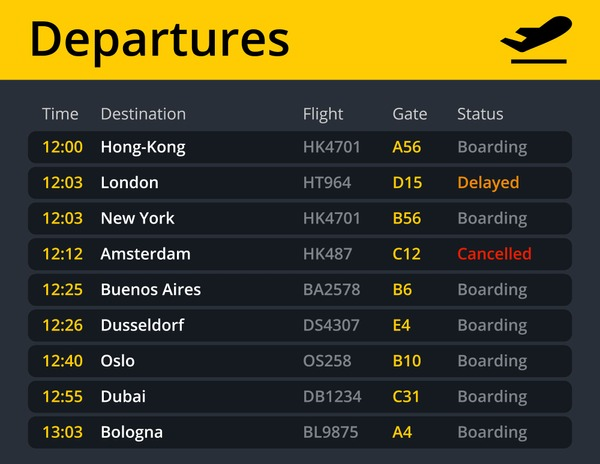

In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [ ]:
response = model.generate_content(["Title the image in 5 words.", img])
to_markdown(response.text)

> Airport Departures Flight Schedule

In [ ]:
response = model.generate_content(["Describe the image in detail", img])
to_markdown(response.text)

> The image is a stylized digital departures board at an airport. 
> 
> 
> The top of the board shows "Departures" in large, bold white lettering against a yellow background. A small, stylized airplane icon is positioned to the upper right. Below this, the main information is presented in a dark grey table. The columns are clearly labeled: "Time," "Destination," "Flight," "Gate," and "Status."
> 
> 
> Each row displays the details of a flight. The information includes the departure time (in HH:MM format), the destination city, the flight number, the assigned gate, and the flight status. 
> 
> 
> The status column uses different colors to indicate the flight's condition.  "Boarding" is shown in standard white text, "Delayed" is orange, and "Cancelled" is red. The flight to Amsterdam is the only one shown as cancelled. All the other flights are either boarding or delayed.

In [ ]:
response = model.generate_content(["Read the text in the image.", img])
to_markdown(response.text)

> Here's a summary of the departure board information:
> 
> **Flight Status Summary:**
> 
> * **Hong Kong (HK4701):** Boarding at Gate A56.
> * **London (HT964):** Delayed at Gate D15.
> * **New York (HK4701):** Boarding at Gate B56.
> * **Amsterdam (HK487):** Cancelled at Gate C12.
> * **Buenos Aires (BA2578):** Boarding at Gate B6.
> * **Dusseldorf (DS4307):** Boarding at Gate E4.
> * **Oslo (OS258):** Boarding at Gate B10.
> * **Dubai (DB1234):** Boarding at Gate C31.
> * **Bologna (BL9875):** Boarding at Gate A4.

In [ ]:
response = model.generate_content(["Parse the time and city in this image into a list with two columns: time and city.", img])
to_markdown(response.text)

> Here's the requested list:
> 
> | Time    | City           |
> |---------|-----------------|
> | 12:00   | Hong-Kong      |
> | 12:03   | London          |
> | 12:03   | New York        |
> | 12:12   | Amsterdam       |
> | 12:25   | Buenos Aires    |
> | 12:26   | Dusseldorf      |
> | 12:40   | Oslo            |
> | 12:55   | Dubai           |
> | 13:03   | Bologna         |

In [ ]:
response = model.generate_content(["Calculate the percentage of the flights to different continents.", img])
to_markdown(response.text)

> Here's the calculation of the percentage of flights to different continents, based on the provided data:
> 
> **1. Identify Continents:**
> 
> * **Asia:** Hong Kong
> * **Europe:** London, Amsterdam, Dusseldorf, Oslo, Bologna
> * **North America:** New York
> * **South America:** Buenos Aires
> * **Africa:** Dubai
> 
> 
> **2. Count Flights per Continent:**
> 
> * Asia: 1
> * Europe: 5
> * North America: 1
> * South America: 1
> * Africa: 1
> 
> 
> **3. Calculate Percentages:**
> 
> Total number of flights = 9 (excluding the cancelled flight)
> 
> * Asia: (1/9) * 100% = 11.11%
> * Europe: (5/9) * 100% = 55.56%
> * North America: (1/9) * 100% = 11.11%
> * South America: (1/9) * 100% = 11.11%
> * Africa: (1/9) * 100% = 11.11%
> 
> 
> **Results:**
> 
> * **Asia:** 11.11%
> * **Europe:** 55.56%
> * **North America:** 11.11%
> * **South America:** 11.11%
> * **Africa:** 11.11%
> 
> **Note:**  The cancelled flight was excluded from the percentage calculation.  If you wanted to include it, the total number of flights would be 10, and the percentages would be slightly different.
